In [37]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm

In [27]:
filepaths = []
for i in range(1,15):
    image = 'data/instructors/{}.jpg'.format(i)
    filepaths.append(image)

In [67]:
images = []
for each in filepaths:
    img = cv2.imread(each)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    images.append(gray.reshape(300*300))
images = np.array(images)

In [70]:
from sklearn.decomposition import PCA

In [72]:
faces_pcd = PCA(14).fit(images)

In [73]:
faces_pcd

PCA(copy=True, iterated_power='auto', n_components=14, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

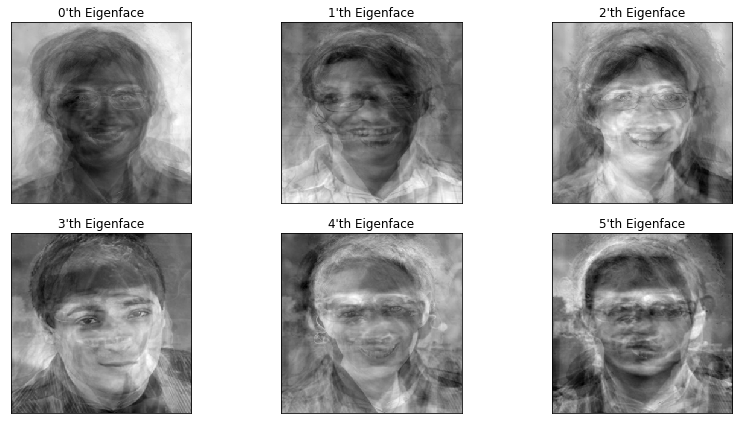

In [74]:
fig, axs = plt.subplots(2, 3, figsize=(12, 6))

for ax, i in zip(axs.flatten(), range(6)):
    eigenface = faces_pcd.components_[i, :].reshape(image_shape)
    ax.imshow(eigenface, cmap=cm.gray)
    ax.set_title("{}'th Eigenface".format(i))
    ax.set_xticks(())
    ax.set_yticks(())
    
fig.tight_layout()

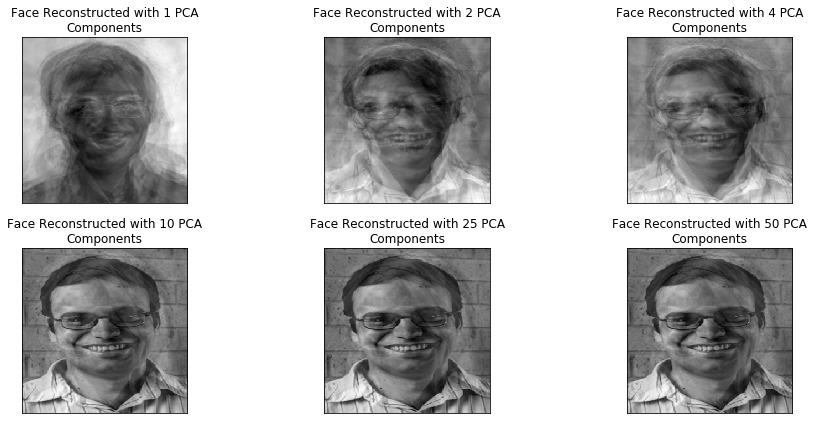

In [78]:
def reduce_face_data(n_dim):
    eigenvalues = faces_pcd.components_[:n_dim, :].T
    faces_reduced = images @ eigenvalues @ eigenvalues.T
    return faces_reduced
 
fig, axs = plt.subplots(2, 3, figsize=(13, 6))

for ax, dim in zip(axs.flatten(), [1, 2, 4, 10, 25, 50]):
    reduced_data = reduce_face_data(dim)
    first_face = reduced_data[0].reshape(image_shape)
    ax.imshow(first_face, cmap=cm.gray)
    ax.set_title("Face Reconstructed with {} PCA\nComponents".format(dim))
    ax.set_xticks(())
    ax.set_yticks(())
    
fig.tight_layout()